In [46]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [47]:
Data= pd.read_csv("C://Users//BHUVAN//Downloads//Bank_customers_data.csv")

In [48]:
Data.head()

,Unnamed: 0,Customer ID,Name,Surname,Gender,Age,Region,Job Classification,Date Joined,Balance,loan,score,loan_eligibility
0,0,100000001,Simon,Walsh,Male,21,England,White Collar,05.Jan.15,113810.15,5252.0,644.0,2276203.00
1,1,400000002,Jasmine,Miller,Female,34,Northern Ireland,Blue Collar,06.Jan.15,36919.73,8907.0,697.0,0.00
2,2,100000003,Liam,Brown,Male,46,England,White Collar,07.Jan.15,101536.83,2162.0,617.0,2030736.60
3,3,300000004,Trevor,Parr,Male,32,Wales,White Collar,08.Jan.15,1421.52,7277.0,672.0,0.00
4,4,100000005,Deirdre,Pullman,Female,38,England,Blue Collar,09.Jan.15,35639.79,2586.0,405.0,178198.95


Encoding

In [49]:
from sklearn.preprocessing import OrdinalEncoder

In [50]:
!pip install feature-engine -q

In [51]:
import feature_engine

using winsorizer for treating outliers

<Axes: >

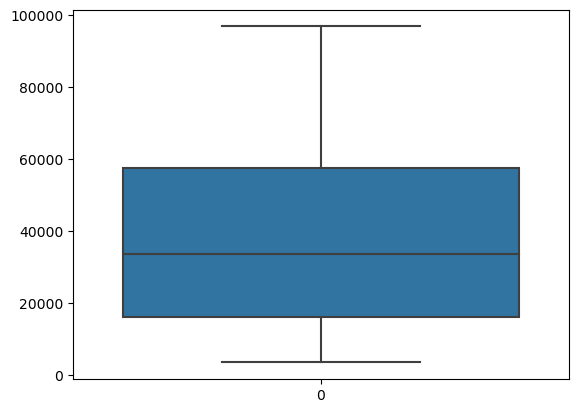

In [52]:
from feature_engine.outliers import Winsorizer
import seaborn as sns
winsor= Winsorizer(capping_method="quantiles", tail="both", variables=["Balance"])
winsor.fit(Data)
data1= winsor.transform(Data)
data1["Balance"].skew()
sns.boxplot(data1["Balance"])

<Axes: >

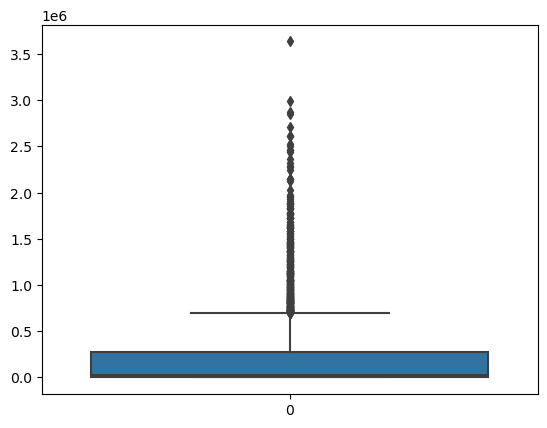

In [53]:
winsor= Winsorizer(capping_method="quantiles", tail="both", variables=["loan_eligibility"])
winsor.fit(data1)
data2= winsor.transform(data1)
data2["loan_eligibility"].skew()
sns.boxplot(data1["loan_eligibility"])

In [68]:
data3=winsor.transform(data2)
data3.head()

,Unnamed: 0,Customer ID,Name,Surname,Gender,Age,Region,Job Classification,Date Joined,Balance,loan,score,loan_eligibility
0,0,100000001,Simon,Walsh,Male,21,England,White Collar,05.Jan.15,96872.4310,5252.0,644.0,931804.385
1,1,400000002,Jasmine,Miller,Female,34,Northern Ireland,Blue Collar,06.Jan.15,36919.7300,8907.0,697.0,0.000
2,2,100000003,Liam,Brown,Male,46,England,White Collar,07.Jan.15,96872.4310,2162.0,617.0,931804.385
3,3,300000004,Trevor,Parr,Male,32,Wales,White Collar,08.Jan.15,3500.5545,7277.0,672.0,0.000
4,4,100000005,Deirdre,Pullman,Female,38,England,Blue Collar,09.Jan.15,35639.7900,2586.0,405.0,178198.950


In [56]:
data4 = data3[['Balance','loan', 'score', 'loan_eligibility']]

In [57]:
#using standard scalar for standardization
scaler = StandardScaler()
data4 = scaler.fit_transform(data4)

In [58]:
# Using within-cluster sum of square method(wcss)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data4)
    wcss.append(kmeans.inertia_)

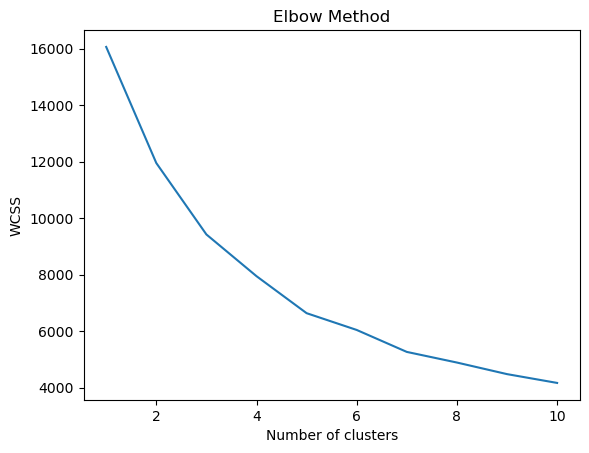

In [59]:
#plotting the Elbow graph based on the wcss and no of clusters
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [60]:
#giving kmeans parametrs 
#we have taken 2 clusters
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
kmeans.fit(data4)

KMeans(n_clusters=2, random_state=42)

In [61]:
data3['Cluster'] = kmeans.labels_

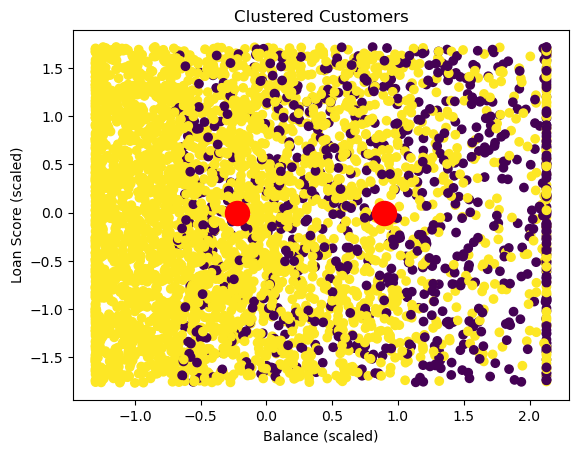

In [62]:
plt.scatter(data4[:, 0], data4[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.title('Clustered Customers')
plt.xlabel('Balance (scaled)')
plt.ylabel('Loan Score (scaled)')
plt.show()

In [63]:
#inverse transformation of the cluster centers and creating a dataframe
luster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_df = pd.DataFrame(cluster_centers, columns=['Balance', 'loan', 'score', 'loan_eligibility'])
cluster_df['Cluster'] = range(n_clusters)
print(cluster_df)

        Balance         loan       score  loan_eligibility  Cluster
0  63214.929188  5556.546482  564.942211     651107.528122        0
1  32869.585112  5558.213797  485.268179      68329.405671        1


In [64]:
#assigning high and low priority customers based on the cluster data
high_priority_customers = data3[data3['Cluster'] == 1]
low_priority_customers = data3[data3['Cluster'] == 0]

In [69]:
print("High Priority Customers:")
print(high_priority_customers.head())

High Priority Customers:
   Unnamed: 0  Customer ID     Name  Surname  Gender  Age            Region  \
1           1    400000002  Jasmine   Miller  Female   34  Northern Ireland   
3           3    300000004   Trevor     Parr    Male   32             Wales   
4           4    100000005  Deirdre  Pullman  Female   38           England   
5           5    300000006      Ava  Coleman  Female   30             Wales   
6           6    100000007  Dorothy  Thomson  Female   34           England   

  Job Classification Date Joined     Balance    loan  score  loan_eligibility  \
1        Blue Collar   06.Jan.15  36919.7300  8907.0  697.0              0.00   
3       White Collar   08.Jan.15   3500.5545  7277.0  672.0              0.00   
4        Blue Collar   09.Jan.15  35639.7900  2586.0  405.0         178198.95   
5        Blue Collar   09.Jan.15  96872.4310  5433.0  483.0              0.00   
6        Blue Collar   11.Jan.15  42879.8400  2644.0  467.0         214399.20   

   Cluster  


In [70]:
print("\nLow Priority Customers:")
print(low_priority_customers.head())


Low Priority Customers:
    Unnamed: 0  Customer ID   Name    Surname  Gender  Age   Region  \
0            0    100000001  Simon      Walsh    Male   21  England   
2            2    100000003   Liam      Brown    Male   46  England   
12          12    100000013   Ryan  MacDonald    Male   24  England   
34          34    100000035  Karen       Dyer  Female   34  England   
48          48    100000049  Simon       Ball    Male   27  England   

   Job Classification Date Joined    Balance    loan  score  loan_eligibility  \
0        White Collar   05.Jan.15  96872.431  5252.0  644.0        931804.385   
2        White Collar   07.Jan.15  96872.431  2162.0  617.0        931804.385   
12       White Collar   12.Jan.15  40781.630  6616.0  524.0        407816.300   
34        Blue Collar   31.Jan.15  77809.590  3633.0  561.0        778095.900   
48       White Collar   12.Feb.15  23921.890  8009.0  617.0        478437.800   

    Cluster  
0         0  
2         0  
12        0  
34   